In [1]:
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.feature_extraction import DictVectorizer

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
response = requests.get(url)

In [3]:
csv_file = "data.csv"

In [4]:
if response.status_code == 200:
    with open(csv_file, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file.")

File downloaded successfully.


In [5]:
df = pd.read_csv(csv_file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
columns_to_select = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"    
]

In [8]:
df_reduced = df[columns_to_select]
# df_reduced

In [9]:
df_reduced.columns = df_reduced.columns.str.replace(' ', '_').str.lower()
# df_reduced

In [10]:
df_reduced = df_reduced.fillna(0)
# df_reduced

In [11]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [12]:
average_price = df_reduced['msrp'].mean()
average_price

40594.737032063116

In [13]:
# Create the "above_average" column based on the condition
df_reduced["above_average"] = df_reduced["msrp"].apply(lambda x: 1 if x > average_price else 0)
df_reduced

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [14]:
X = df_reduced.drop(columns=["msrp", "above_average"])
y = df_reduced["above_average"]
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)

In [15]:
display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

display(y_train.shape)
display(y_test.shape)
display(y_val.shape)

(7148, 9)

(2383, 9)

(2383, 9)

(7148,)

(2383,)

(2383,)

C:\Users\KonuTech\AppData\Local\Temp\ipykernel_24972\178618518.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  auc_scores = pd.concat([auc_scores, pd.DataFrame({'Feature': [feature], 'AUC': [auc]})], ignore_index=True)


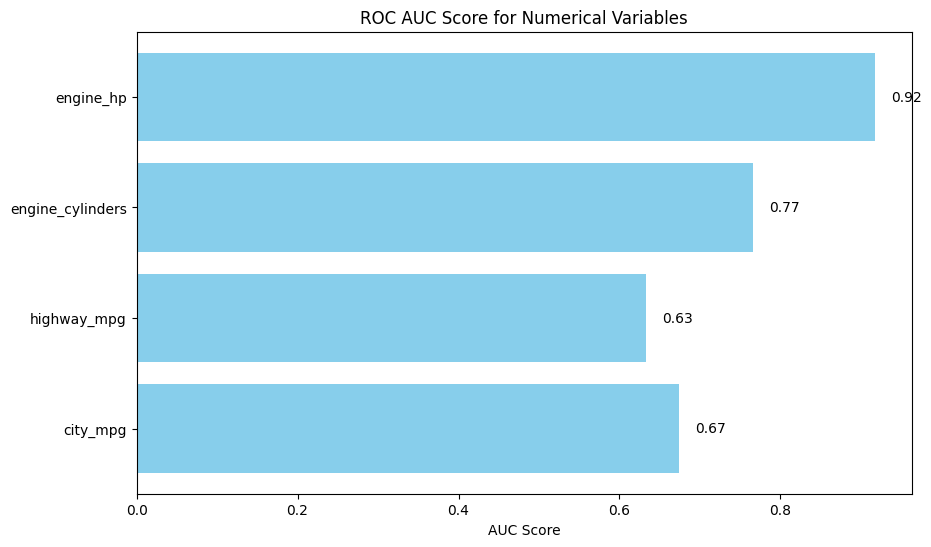

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming your DataFrame is named 'df' and you've already split it into training and testing sets
# Select numerical variables
numerical_variables = X_train.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the AUC scores
auc_scores = pd.DataFrame(columns=['Feature', 'AUC'])

# Loop through each numerical variable
for feature in numerical_variables.columns:
    if feature not in ("year"):
        # Calculate the ROC AUC score
        auc = roc_auc_score(y_train, X_train[feature])
        
        # If AUC is less than 0.5, negate the variable
        if auc < 0.5:
            auc = roc_auc_score(y_train, -X_train[feature])
        
        # Append the feature and AUC score to the DataFrame
        auc_scores = pd.concat([auc_scores, pd.DataFrame({'Feature': [feature], 'AUC': [auc]})], ignore_index=True)

# Create a bar chart to visualize the AUC scores
plt.figure(figsize=(10, 6))
bars = plt.barh(auc_scores['Feature'], auc_scores['AUC'], color='skyblue')
plt.xlabel('AUC Score')
plt.title('ROC AUC Score for Numerical Variables')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest AUC at the top

# Annotate the bars with AUC values
for bar, auc in zip(bars, auc_scores['AUC']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{auc:.2f}', va='center')

plt.show()


In [17]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...
5864,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7924,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
4719,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
63,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16


In [18]:
# Apply one-hot encoding using DictVectorizer
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(X_train.to_dict(orient='records'))
X_val_encoded = dv.transform(X_val.to_dict(orient='records'))

# Train a logistic regression model with specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Predict probabilities on the validation set
y_val_pred_prob = model.predict_proba(X_val_encoded)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_val_pred_prob)

# Print the AUC score rounded to 3 digits
print(f'AUC on the validation dataset: {auc_score:.3f}')

AUC on the validation dataset: 0.979


c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


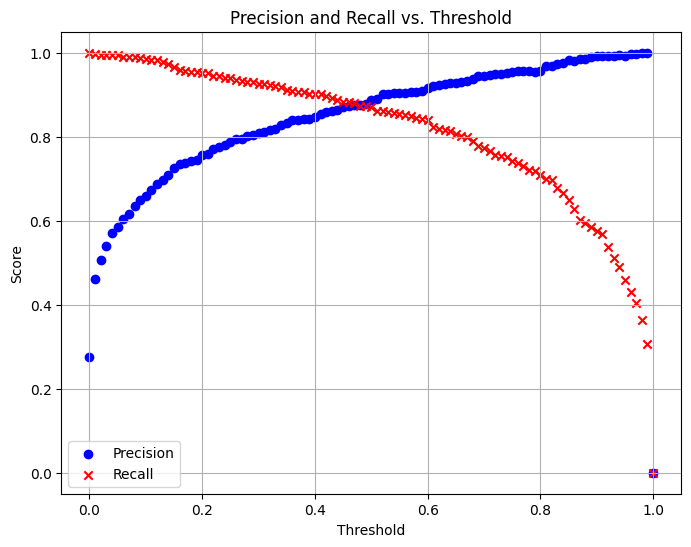

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Define a range of thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize empty lists to store precision and recall values for each threshold
precision_values = []
recall_values = []

# Loop through each threshold
for threshold in thresholds:
    # Predict binary labels based on the threshold
    y_val_pred = (y_val_pred_prob >= threshold).astype(int)
    
    # Compute precision and recall
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    
    # Append precision and recall values to the lists
    precision_values.append(precision)
    recall_values.append(recall)

# Create a scatter plot with threshold on the x-axis and precision/recall on the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(thresholds, precision_values, label='Precision', marker='o', color='b')
plt.scatter(thresholds, recall_values, label='Recall', marker='x', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


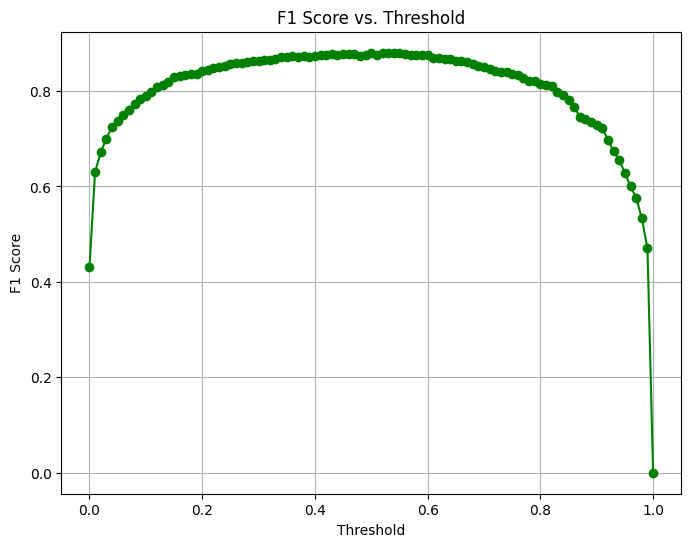

In [20]:
import numpy as np
from sklearn.metrics import f1_score

# Define a range of thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize an empty list to store F1 scores for each threshold
f1_scores = []

# Loop through each threshold
for threshold in thresholds:
    # Predict binary labels based on the threshold
    y_val_pred = (y_val_pred_prob >= threshold).astype(int)
    
    # Compute the F1 score
    f1 = f1_score(y_val, y_val_pred)
    
    # Append the F1 score to the list
    f1_scores.append(f1)

# Plot F1 scores against thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.grid(True)
plt.show()


In [21]:
X

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16


In [22]:
columns_to_select

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'MSRP']

In [23]:
columns_to_select.remove("MSRP")
columns_to_select

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg']

In [24]:
# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Define the logistic regression model with specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# Define the number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Iterate over different folds
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply one-hot encoding using DictVectorizer on the training data
    X_train_encoded = dv.fit_transform(X_train.to_dict(orient='records'))
    
    # Transform the validation data using the same DictVectorizer
    X_val_encoded = dv.transform(X_val.to_dict(orient='records'))
    
    # Fit the model on the training data
    model.fit(X_train_encoded, y_train)
    
    # Predict probabilities on the validation set
    y_val_pred_prob = model.predict_proba(X_val_encoded)[:, 1]
    
    # Calculate the AUC score for this fold
    auc = roc_auc_score(y_val, y_val_pred_prob)
    
    # Append the AUC score to the list
    auc_scores.append(auc)

# Calculate the standard deviation of the AUC scores
std_deviation = np.std(auc_scores)

# Print the standard deviation
print(f'Standard Deviation of AUC Scores: {std_deviation:.3f}')


Standard Deviation of AUC Scores: 0.001


In [25]:
# Define the C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize an empty list to store mean scores for each C value
mean_scores = []

# Initialize K-Fold cross-validator with the same parameters as before
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Iterate over different C values
for C in C_values:
    # Initialize an empty list to store AUC scores for each fold
    auc_scores = []
    
    # Define the logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    # Iterate over different folds
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Apply one-hot encoding using DictVectorizer on the training data
        X_train_encoded = dv.fit_transform(X_train.to_dict(orient='records'))
        
        # Transform the validation data using the same DictVectorizer
        X_val_encoded = dv.transform(X_val.to_dict(orient='records'))

        # Fit the model on the training data
        model.fit(X_train_encoded, y_train)

        # Predict probabilities on the validation set
        y_val_pred_prob = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate the AUC score for this fold
        auc = roc_auc_score(y_val, y_val_pred_prob)

        # Append the AUC score to the list
        auc_scores.append(auc)
    
    # Calculate the mean AUC score for this C value
    mean_auc = np.mean(auc_scores)
    
    # Append the mean AUC score to the list of mean scores
    mean_scores.append(mean_auc)

# Find the index of the C value with the best mean score
best_index = np.argmax(mean_scores)

# Get the best C value and its corresponding mean score
best_C = C_values[best_index]
best_mean_score = round(mean_scores[best_index], 3)

# Calculate the standard deviation of the AUC scores for the best C value
best_std_deviation = round(np.std(auc_scores), 3)

# Print the results
print(f"Best C: {best_C}")
print(f"Best Mean Score: {best_mean_score}")
print(f"Standard Deviation for Best C: {best_std_deviation}")


Best C: 10
Best Mean Score: 0.981
Standard Deviation for Best C: 0.005
